In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [7]:
df=pd.read_csv('data.csv', index_col='COUNTRY')

In [8]:
df.head()

,Additional health/documents requirements upon arrival,Amendments to funeral and burial regulations,Awareness campaigns,Border checks,Border closure,Changes in prison-related policies,Checkpoints within the country,Closure of businesses and public services,Complete border closure,Curfews,...,Partial lockdown,Psychological assistance and medical social work,Requirement to wear protective gear in public,Schools closure,State of emergency declared,Strengthening the public health system,Surveillance and monitoring,Testing policy,Visa restrictions,Deaths per Population*1000000
COUNTRY,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,-31.0,-23.0,0.0,36.0,NaN,NaN,NaN,NaN,...,33.0,NaN,NaN,6.0,0.0,-22.0,-11.0,NaN,NaN,"24,7012930959163"
Albania,NaN,NaN,2.0,NaN,5.0,14.0,1.0,1.0,NaN,14.0,...,24.0,NaN,NaN,1.0,52.0,-45.0,35.0,NaN,NaN,"28,8352637905518"
Algeria,NaN,NaN,9.0,16.0,21.0,NaN,27.0,20.0,NaN,27.0,...,27.0,NaN,72.0,16.0,NaN,NaN,NaN,NaN,NaN,"22,6161387942366"
Angola,20.0,NaN,-9.0,7.0,7.0,13.0,NaN,7.0,NaN,NaN,...,37.0,NaN,27.0,3.0,7.0,6.0,43.0,50.0,-19.0,"0,673920852835811"
Antigua and Barbuda,83.0,15.0,-10.0,NaN,13.0,15.0,NaN,12.0,NaN,15.0,...,34.0,NaN,15.0,2.0,12.0,-30.0,113.0,NaN,-42.0,"30,6861421382104"


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, Afghanistan to Zimbabwe
Data columns (total 36 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Additional health/documents requirements upon arrival         182 non-null    float64
 1   Amendments to funeral and burial regulations                  182 non-null    float64
 2   Awareness campaigns                                           182 non-null    float64
 3   Border checks                                                 182 non-null    float64
 4   Border closure                                                182 non-null    float64
 5   Changes in prison-related policies                            182 non-null    float64
 6   Checkpoints within the country                                182 non-null    float64
 7   Closure of businesses and public services                    

In [24]:
df['Deaths per Population*1000000']=df['Deaths per Population*1000000'].apply(lambda x: x.replace(",","."))

In [26]:
df['Deaths per Population*1000000']=df['Deaths per Population*1000000'].astype(float)

In [10]:
df.fillna(value=1000000, inplace=True)

In [11]:
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop('Deaths per Population*1000000', axis=1)
y=df['Deaths per Population*1000000']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff']).sort_values('Coeff')

,Coeff
State of emergency declared,-0.008124
Schools closure,-0.006986
Obligatory medical tests not related to COVID-19,-0.006632
Strengthening the public health system,-0.006307
Visa restrictions,-0.005243
Curfews,-0.005024
Economic measures,-0.005010
Border closure,-0.003615
Psychological assistance and medical social work,-0.002266
Full lockdown,-0.002179


In [36]:
predictions=lm.predict(X_test)

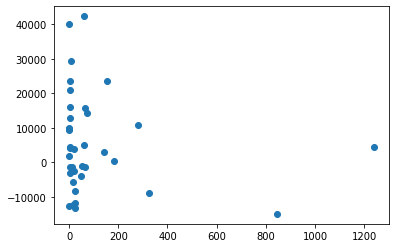

In [37]:
plt.scatter(y_test, predictions)

In [38]:
predictions

array([  9607.36923568,  -1417.43731081,   3874.54818273,  23626.44151781,
        10084.35220651,  23490.02190112,   5152.25941256,  -1014.63724431,
        -3804.20429941,   1975.11740619,  10727.28095809,  -8833.93875437,
       -12451.58634965,  -3159.92459035,  -1366.03676076, -13146.5600127 ,
        42392.53990335,  15951.89002061,  21098.93854164, -12604.7722837 ,
        -1266.77148388,  29373.85585981, -11883.3777321 ,  -5545.89224135,
        12832.58149671,   4591.16645312, -14941.67048585,    318.72352152,
        14347.05594336,  -2428.38209812,   4032.21490179,  40233.04149215,
        15661.3140399 ,   9482.08916065,  -8322.13196484,   3078.19355794,
         4381.96930341])

In [52]:
from sklearn.metrics import mean_absolute_error

In [41]:
metrics.mean_absolute_error(y_test, predictions)

11018.142968744858

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf_1=RandomForestRegressor(n_estimators=10)
rf_2=RandomForestRegressor(n_estimators=30)
rf_3=RandomForestRegressor(n_estimators=50)
rf_4=RandomForestRegressor(n_estimators=100)
rf_5=RandomForestRegressor(n_estimators=200)

In [47]:
def score_model(model):
    model.fit(X_train, y_train)
    preds=model.predict(X_test)
    return mean_absolute_error(y_test, preds)

In [48]:
models=[rf_1, rf_2, rf_3, rf_4, rf_5]

In [55]:
for i in range(0, len(models)):
    mae=score_model(models[i])
    print("Random Forest Model %d MAE: %d"%(i+1, mae))

Random Forest Model 1 MAE: 1040
Random Forest Model 2 MAE: 418
Random Forest Model 3 MAE: 620
Random Forest Model 4 MAE: 503
Random Forest Model 5 MAE: 649


In [56]:
from sklearn.inspection import permutation_importance

In [57]:
model=RandomForestRegressor(n_estimators=100).fit(X,y)
result=permutation_importance(model, X, y, n_repeats=10,random_state=0)

In [66]:
importances = model.feature_importances_

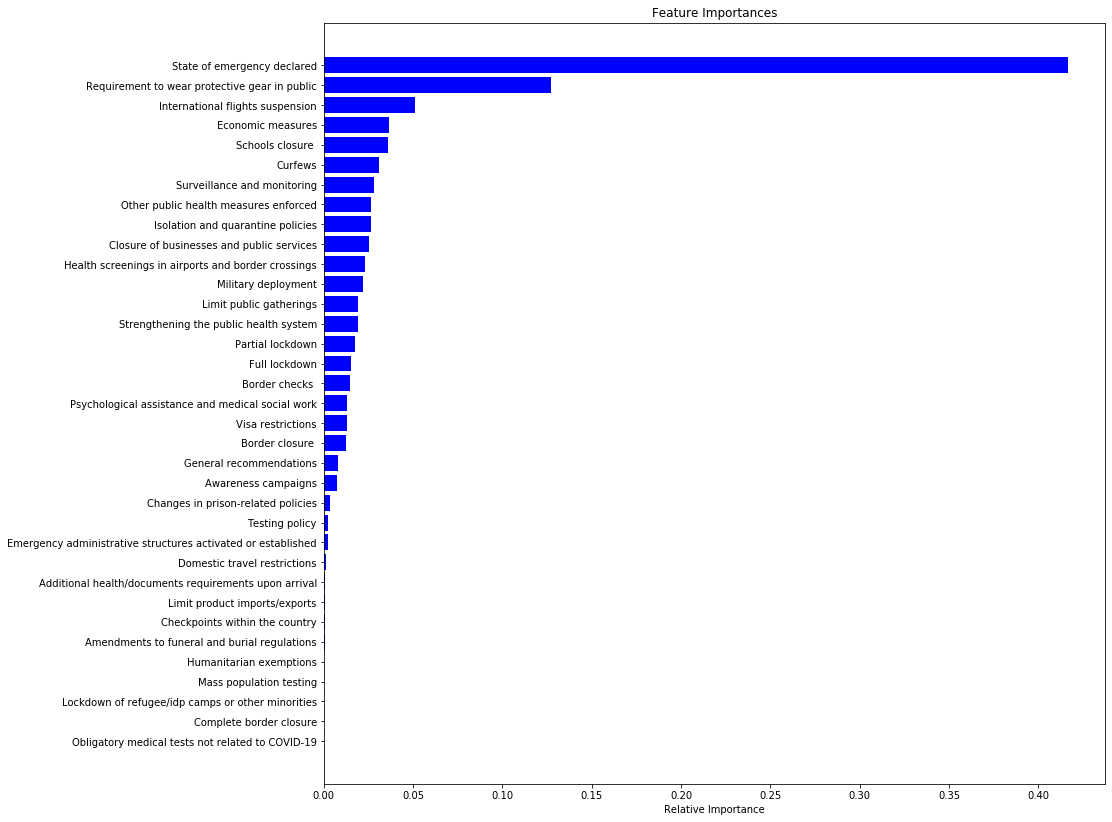

In [79]:
features=X.columns
indices = np.argsort(importances)
plt.figure(figsize=(14,14))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [81]:
from treeinterpreter import treeinterpreter as ti

/home/pitzm/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [84]:
hun=df.loc['Hungary'][:-1]

In [87]:
df.loc['Hungary'][-1:]

Deaths per Population*1000000    61.147259
Name: Hungary, dtype: float64

In [101]:
hun=pd.DataFrame(hun.transpose())

In [102]:
hun

,Additional health/documents requirements upon arrival,Amendments to funeral and burial regulations,Awareness campaigns,Border checks,Border closure,Changes in prison-related policies,Checkpoints within the country,Closure of businesses and public services,Complete border closure,Curfews,...,Other public health measures enforced,Partial lockdown,Psychological assistance and medical social work,Requirement to wear protective gear in public,Schools closure,State of emergency declared,Strengthening the public health system,Surveillance and monitoring,Testing policy,Visa restrictions
Hungary,1000000.0,1000000.0,-30.0,9.0,-2.0,1000000.0,1000000.0,5.0,1000000.0,1000000.0,...,24.0,13.0,29.0,49.0,7.0,7.0,1.0,13.0,54.0,-30.0


In [91]:
X_hun=X.drop('Hungary')
y_hun=y.drop('Hungary')

In [93]:
model_hun=RandomForestRegressor(n_estimators=100).fit(X_hun,y_hun)

In [103]:
model_hun.predict(hun)

array([78.71335242])

In [104]:
prediction, bias, contributions = ti.predict(model_hun, hun)

In [137]:
result=pd.DataFrame(data=contributions.transpose(), index=X.columns, columns=['Contributions'])

In [141]:
result.sort_values('Contributions').head(10)

,Contributions
State of emergency declared,-1721.639864
Economic measures,-506.961691
International flights suspension,-49.569132
Health screenings in airports and border crossings,-12.891331
Limit public gatherings,-9.477808
Isolation and quarantine policies,-8.225513
Full lockdown,-5.173058
Changes in prison-related policies,-2.717270
General recommendations,-2.327265
Testing policy,-2.281603
